
#**PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS**
##**PÓS-GRADUAÇÃO LATO SENSU EM CIÊNCIA DE DADOS E BIG DATA**
###***TCC - TRABALHO DE CONCLUSÃO DE CURSO:***
###***APLICAÇÃO DE MODELOS ESTATÍSTICOS E DE APRENDIZADO DE MÁQUINA PARA A ESTIMATIVA DO PREÇO DA GASOLINA EM FUNÇÃO DE VARIÁVEIS ECONÔMICAS***
# Discente: Henrique Viegas Cunha
<hr>

#***PROJETO FUEL_PRICE: análise de dados e interpretação dos resultados***
# **Capítulo 6**

### O presente *notebook* visa ajudar a análise dos dados modelados pelos notebooks **modela_dados_ARIMA_VAR.ipynb** e **modela_dados_LSTM.ipynb** e a interpretação dos resultados obtidos
<hr> 

# Importando bibliotecas e *Montando* o Drive:
<hr WIDTH=30% ALIGN=LEFT NOSHADE>

### Importação das bibliotecas estatísticas e ligadas ao ML e Keras
<hr>

In [ ]:
# Instalando stasmodels
#Última versão dispoível em 08/09/2022
!pip install statsmodels==0.13.2 
from statsmodels.tsa.stattools import adfuller

# Importando o teste de Causalidade de Granger:
from statsmodels.tsa.stattools import grangercausalitytests

# Retirando warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

# Ignorando os avisos de erro na convergência
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# Importando as bibliotecas de modelagem
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.vector_ar.var_model import VAR

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Importação de bibliotecas diversas para manipulação de dados
<hr>

In [ ]:
# Bibliotecas
# Para manipulação de dados
import numpy as np
import pandas as pd
import math
import string

# Para plotagem dos gráficos
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Selecionando o tema para os gráficos
sns.set_theme(style='ticks')

# Para manipulação de datas
from datetime import datetime
import time
! pip install pytz
import pytz

# Biblioteca de datas: datas relativas
from dateutil.relativedelta import relativedelta

# Atualizando para a leitura de planilha Excel
!pip install xlrd
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Definindo parâmetros de apresentação dos dados:
pd.set_option('display.max_columns', 20) #None) 
pd.set_option('display.max_rows', 20) #None) 
pd.set_option('display.max_colwidth', 20) #None)

###*Montando* o drive do *Google* para a leitura de arquivos no Google Drive e a exportação de dataframes
<hr>

In [ ]:
# "MONTANDO" o drive do Google Drive
# Load the Drive helper and mount (carregando)
from google.colab import drive
# This will prompt for authorization (prompt de autorização)
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Definindo caminhos e nomes de arquivo:
<hr>

In [ ]:
# Definindo o caminho para salvamento dos gráficos gerados
# path_fig = r'C:\\Users\\Henrique\\Documents\\TCC-PUCMG\\DADOS\\GRAFICOS\\'
path_fig = r'/content/drive/MyDrive/NOVO_TCC/DADOS/GRAFICOS/'

# Caminho onde se encontram os dataframes:
# path_backup_df = r'C:\Users\Henrique\Documents\TCC-PUCMG\DADOS\BACKUP_DF\' 
path_backup_df = r'/content/drive/MyDrive/NOVO_TCC/DADOS/BACKUP_DF/'

# Caminho onde se encontram os dataframes:
# path_analise = r'C:\Users\Henrique\Documents\TCC-PUCMG\DADOS\ANALISE\' 
path_analise = r'/content/drive/MyDrive/NOVO_TCC/DADOS/ANALISE/'

# Definindo o caminho para salvamento dos gráficos gerados
# path_fig = r'C:\\Users\\Henrique\\Documents\\TCC-PUCMG\\DADOS\\GRAFICOS\\'
path_fig = r'/content/drive/MyDrive/NOVO_TCC/DADOS/GRAFICOS/'

In [ ]:
#Função para salvar o dataframe na pasta escolhida, com o nome definido:
def salva_dataframe (df, caminho_nome_completo):
  # Salvando dataframe como CSV 
  df.to_csv(caminho_nome_completo + '.csv', header=True, index=True)
  # Salvando dataframe como Excel:
  df.to_excel(caminho_nome_completo + '.xls', header=True, index=True)

# Obtendo os dados de trabalho
# Dataset de trabalho *df_trab* 
<hr WIDTH=30% ALIGN=LEFT NOSHADE>

In [ ]:
# Leitura do dataset de trabalho, df_final
arq_exportado = path_backup_df+'df_final.csv'
df_trab = pd.read_csv(arq_exportado)
# Dimensões de df_trab:
print(f"\nDimensões de df_trab:\n {df_trab.shape} \n\ndf_trab.head():")
# Visualizando o dataset obtido
df_trab.head()


Dimensões de df_trab:
 (2176, 7) 

df_trab.head():


,Date,PETR4,USD/BRL,IPCA,MWh,Fuel_Price,Brent
0,2011-01-03,27.000000,1.6470,0.43,35873744,2.584085,94.84
1,2011-01-04,26.900000,1.6610,0.43,35873744,2.637004,93.53
2,2011-01-05,27.219999,1.6737,0.43,35873744,2.606665,95.50
3,2011-01-06,27.110001,1.6856,0.43,35873744,2.669766,94.52
4,2011-01-10,26.980000,1.6888,0.43,35873744,2.614946,95.70


In [ ]:
# Modificando coluna Date para tipo Datetime
df_trab['Date'] = pd.to_datetime(df_trab['Date'])
# Modificando coluna MWh para tipo float
df_trab['MWh'] = df_trab['MWh'].astype(float)
# Reindexando o dataset obtido
df_trab = df_trab.reindex(columns=['Date','Fuel_Price','USD/BRL','PETR4','Brent','IPCA','MWh'])
df_trab.head()

,Date,Fuel_Price,USD/BRL,PETR4,Brent,IPCA,MWh
0,2011-01-03,2.584085,1.6470,27.000000,94.84,0.43,35873744.0
1,2011-01-04,2.637004,1.6610,26.900000,93.53,0.43,35873744.0
2,2011-01-05,2.606665,1.6737,27.219999,95.50,0.43,35873744.0
3,2011-01-06,2.669766,1.6856,27.110001,94.52,0.43,35873744.0
4,2011-01-10,2.614946,1.6888,26.980000,95.70,0.43,35873744.0


### Criando novo dataframe de trabalho, *df_new*, cópia de *df_final*. Para uso ao longo do trabalho
<hr WIDTH=30% ALIGN=LEFT NOSHADE>

In [ ]:
# Criando uma cópia do dataframe para uso geral:
df_new = df_trab.copy()
# Fixando a coluna Date como index da série temporal
df_new = df_new.set_index('Date')
df_new.head()

,Fuel_Price,USD/BRL,PETR4,Brent,IPCA,MWh
Date,,,,,,
2011-01-03,2.584085,1.6470,27.000000,94.84,0.43,35873744.0
2011-01-04,2.637004,1.6610,26.900000,93.53,0.43,35873744.0
2011-01-05,2.606665,1.6737,27.219999,95.50,0.43,35873744.0
2011-01-06,2.669766,1.6856,27.110001,94.52,0.43,35873744.0
2011-01-10,2.614946,1.6888,26.980000,95.70,0.43,35873744.0


### Buscando os resultados em ***df_all_metrics***, ***df_ypred*** e ***df_metricas***:
<hr WIDTH=30% ALIGN=LEFT NOSHADE>

In [ ]:
# As métricas encontradas:
df_all_metrics = pd.read_csv(path_backup_df+'df_all_metrics'+'.csv')
df_all_metrics

,MODELO,RMSE,MAE,corr,Tempo_Processamento
0,ARIMA_1,0.122246,0.091244,0.990621,804.27
1,ARIMA_2,0.122158,0.091162,0.990630,996.20
2,VAR_1,0.123234,0.090607,0.990291,8.50
3,VAR_2,0.122975,0.090667,0.990388,4.26
4,LSTM_1,0.160811,0.126215,0.972672,50.25
5,LSTM_2,0.131684,0.103806,0.972718,61.05


In [ ]:
# Os valores previstos:
df_ypred = pd.read_csv(path_backup_df+'df_ypred'+'.csv')
df_ypred.head() 

,DATAS,y_REAL,y_ARIMA_1,y_ARIMA_2,y_VAR_1,y_VAR_2,y_LSTM_1,y_LSTM_2
0,2021-01-26,4.786904,4.617979,4.624590,4.640301,4.628515,4.670801,4.638906
1,2021-01-27,4.627419,4.633419,4.632962,4.655449,4.657515,4.701144,4.677329
2,2021-01-28,4.533405,4.639840,4.632933,4.670426,4.651163,4.745069,4.712239
3,2021-02-01,4.849375,4.644449,4.645650,4.640620,4.651114,4.742723,4.694545
4,2021-02-02,4.778471,4.673378,4.678649,4.675744,4.691742,4.701520,4.672906


In [ ]:
# Copiando os valores de df_ypred para uso durante a análise:
df_ypred_new = df_ypred.copy()
df_ypred_new.head()

,DATAS,y_REAL,y_ARIMA_1,y_ARIMA_2,y_VAR_1,y_VAR_2,y_LSTM_1,y_LSTM_2
0,2021-01-26,4.786904,4.617979,4.624590,4.640301,4.628515,4.670801,4.638906
1,2021-01-27,4.627419,4.633419,4.632962,4.655449,4.657515,4.701144,4.677329
2,2021-01-28,4.533405,4.639840,4.632933,4.670426,4.651163,4.745069,4.712239
3,2021-02-01,4.849375,4.644449,4.645650,4.640620,4.651114,4.742723,4.694545
4,2021-02-02,4.778471,4.673378,4.678649,4.675744,4.691742,4.701520,4.672906


In [ ]:
df_ypred_new.tail()

,DATAS,y_REAL,y_ARIMA_1,y_ARIMA_2,y_VAR_1,y_VAR_2,y_LSTM_1,y_LSTM_2
212,2022-01-21,6.534684,6.667772,6.671307,6.694536,6.683267,6.845523,6.647388
213,2022-01-24,6.672293,6.656739,6.659902,6.674997,6.671219,6.786990,6.598468
214,2022-01-25,6.658731,6.642197,6.639241,6.668342,6.645791,6.823188,6.625488
215,2022-01-26,6.637217,6.652101,6.653740,6.662419,6.653867,6.771020,6.590060
216,2022-01-27,6.680007,6.634088,6.640701,6.640147,6.640418,6.825540,6.630710


In [ ]:
# Criando função para gerar df amostral de df_ypred:
def gera_df_amostra(df_x, dias_amostra):
  dias = dias_amostra
  y_DATAS_sample = df_x.loc[df_x.shape[0]-dias::,['DATAS']]
  y_DATAS_sample = pd.to_datetime(y_DATAS_sample['DATAS'], format='%Y/%m/%d')
  y_REAL_sample = df_x.loc[df_x.shape[0]-dias::,['y_REAL']]
  y_ARIMA_01_sample = df_x.loc[df_x.shape[0]-dias::,['y_ARIMA_1']]
  y_ARIMA_02_sample = df_x.loc[df_x.shape[0]-dias::,['y_ARIMA_2']]
  y_VAR_01_sample = df_x.loc[df_x.shape[0]-dias::,['y_VAR_1']]
  y_VAR_02_sample = df_x.loc[df_x.shape[0]-dias::,['y_VAR_2']]
  y_LSTM_01_sample = df_x.loc[df_x.shape[0]-dias::,['y_LSTM_1']]
  y_LSTM_02_sample = df_x.loc[df_x.shape[0]-dias::,['y_LSTM_2']]
  df_plot = pd.DataFrame()
  df_plot.insert(0, "y_LSTM_2", y_LSTM_02_sample)
  df_plot.insert(0, "y_LSTM_1", y_LSTM_01_sample)
  df_plot.insert(0, "y_VAR_2", y_VAR_02_sample)
  df_plot.insert(0, "y_VAR_1", y_VAR_01_sample)
  df_plot.insert(0, "y_ARIMA_2", y_ARIMA_02_sample)
  df_plot.insert(0, "y_ARIMA_1", y_ARIMA_01_sample)
  df_plot.insert(0, "y_REAL", y_REAL_sample)
  df_plot.insert(0, "DATAS", y_DATAS_sample)
  df_plot.reset_index(inplace = True, drop=True)

  return df_plot

# **Gráficos ARIMA**
<hr>

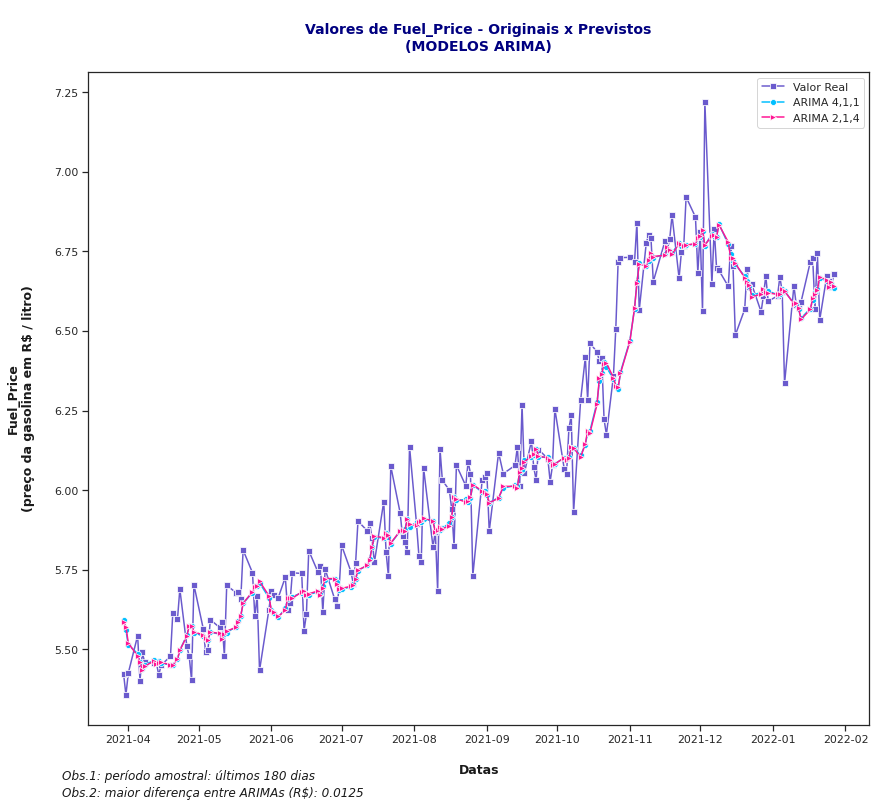

In [ ]:
# Amostra de 180 dias:
dias_plot = 180
df_plot = gera_df_amostra(df_ypred_new, dias_plot)

# Plot:
fig = plt.figure(figsize=(14,12))

sns.lineplot(df_plot["DATAS"], df_plot["y_REAL"], c='slateblue',
             marker="s", label='Valor Real', lw=1.5)
sns.lineplot(df_plot["DATAS"], df_plot["y_ARIMA_1"], c='deepskyblue',
             marker="o", label='ARIMA 4,1,1', lw=1.5)
sns.lineplot(df_plot["DATAS"], df_plot["y_ARIMA_2"], c='deeppink',
             marker=">", label='ARIMA 2,1,4', lw=1.5)

plt.title("\nValores de Fuel_Price - Originais x Previstos\n(MODELOS ARIMA)\n",
          c='navy', fontweight="bold", fontsize=14)
max_dif = round(max(abs(df_plot["y_ARIMA_1"]-df_plot["y_ARIMA_2"])),5)
plt.ylabel("Fuel_Price\n(preço da gasolina em R$ / litro)\n", c='k',
           fontweight="bold", fontsize=12.5)
plt.xlabel("\nDatas", c='k', fontweight="bold", fontsize=12.5)
plt.legend()
plt.figtext(0.0995,0.0615,f"Obs.1: período amostral: últimos {dias_plot} dias",
            c='k', fontsize=12, style='italic')
plt.figtext(0.0995,0.0415,f"Obs.2: maior diferença entre ARIMAs (R$): {max_dif:.4f}",
            c='k', fontsize=12, style='italic')

#Salvando o gráfico/a figura gerada:
fig = plt.gcf()
fig.savefig(path_fig+f'COMPARA_ARIMAS_{dias_plot}_dias', format='jpg')
plt.show()

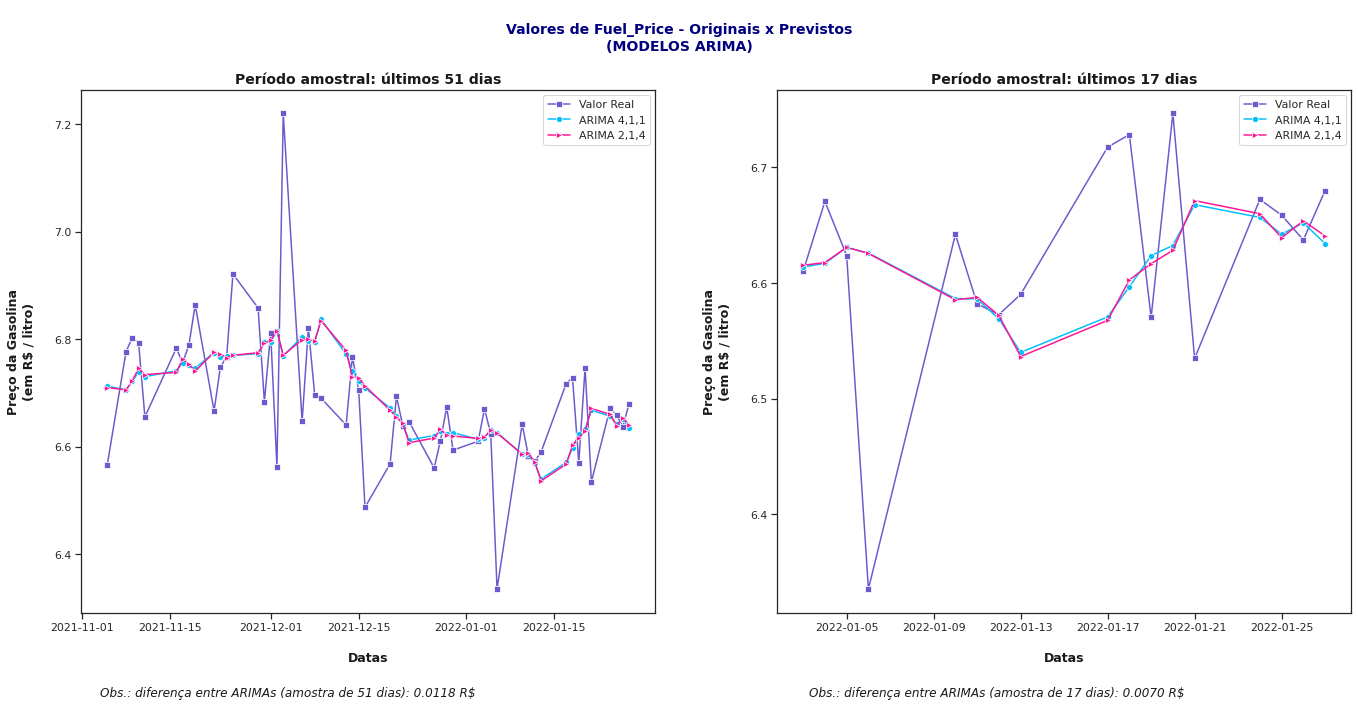

In [ ]:
# Amostra de 17 e 51 dias:
dias_plot_1 = 51
df_plot_1 = gera_df_amostra(df_ypred_new, dias_plot_1)
dias_plot_2 = 17
df_plot_2 = gera_df_amostra(df_ypred_new, dias_plot_2)

max_dif_1 = round(max(abs(df_plot_1["y_ARIMA_1"]-df_plot_1["y_ARIMA_2"])),5)
max_dif_2 = round(max(abs(df_plot_2["y_ARIMA_1"]-df_plot_2["y_ARIMA_2"])),5)

# Plot:
plt.subplots(figsize=(20, 10)) 
ax1 = plt.subplot(1, 2, 1)
sns.lineplot(df_plot_1["DATAS"], df_plot_1["y_REAL"], c='slateblue',
             marker="s", label='Valor Real', lw=1.5)
sns.lineplot(df_plot_1["DATAS"], df_plot_1["y_ARIMA_1"], c='deepskyblue',
             marker="o", label='ARIMA 4,1,1', lw=1.5)
sns.lineplot(df_plot_1["DATAS"], df_plot_1["y_ARIMA_2"], c='deeppink',
             marker=">", label='ARIMA 2,1,4', lw=1.5)
plt.title(f"\n\nPeríodo amostral: últimos {dias_plot_1} dias",
          c='k', fontweight="bold", fontsize=14)
plt.ylabel("Preço da Gasolina\n(em R$ / litro)\n", c='k',
           fontweight="bold", fontsize=12.5)
plt.xlabel("\nDatas", c='k', fontweight="bold", fontsize=12.5)
plt.legend()

ax2 = plt.subplot(1, 2, 2)
#ax2.label_outer()
sns.lineplot(df_plot_2["DATAS"], df_plot_2["y_REAL"], c='slateblue',
             marker="s", label='Valor Real', lw=1.5)
sns.lineplot(df_plot_2["DATAS"], df_plot_2["y_ARIMA_1"], c='deepskyblue',
             marker="o", label='ARIMA 4,1,1', lw=1.5)
sns.lineplot(df_plot_2["DATAS"], df_plot_2["y_ARIMA_2"], c='deeppink',
             marker=">", label='ARIMA 2,1,4', lw=1.5)
plt.title(f"\n\nPeríodo amostral: últimos {dias_plot_2} dias",
          c='k', fontweight="bold", fontsize=14)
plt.ylabel("Preço da Gasolina\n(em R$ / litro)\n", c='k',
           fontweight="bold", fontsize=12.5)
plt.xlabel("\nDatas", c='k', fontweight="bold", fontsize=12.5)
plt.legend()

plt.suptitle("\nValores de Fuel_Price - Originais x Previstos\n(MODELOS ARIMA)\n\n",
             c='navy', fontweight="bold", fontsize=14)

plt.tight_layout(4) 

plt.figtext(0.0975,0.0215,
            f"Obs.: diferença entre ARIMAs (amostra de {dias_plot_1} dias): {max_dif_1:.4f} R$",
            c='k', fontsize=12, style='italic')
plt.figtext(0.590,0.0215,
            f"Obs.: diferença entre ARIMAs (amostra de {dias_plot_2} dias): {max_dif_2:.4f} R$",
            c='k', fontsize=12, style='italic')

#Salvando o gráfico/a figura gerada:
fig = plt.gcf()
fig.savefig(path_fig+f'COMPARA_ARIMAS_{dias_plot_1}_e_{dias_plot_2}_dias', format='jpg')

plt.show()

# **Granger Causality**
<hr>

In [ ]:
# Diferenciando as séries aplicando o adfuller novamente:
df_diff = df_new.copy()
for col in df_diff.drop(columns=['IPCA', 'MWh']).columns:
    df_diff[col] = df_diff[col].diff()
df_diff = df_diff.dropna()

In [ ]:
# Fução definida para causalidade de Granger
def grangers_causation_matrix(df_series, variaveis, maxlags, test):   
  """
  Função adaptada de:
  Rishiraj Adhikary 
  Testing for Granger Causality Using Python, May 25, 2020
  Disponível em: https://rishi-a.github.io/2020/05/25/granger-causality.html
  Acesso em: 26 out. 2022.
  """  
  df = pd.DataFrame(np.zeros((len(variaveis), len(variaveis))),
                    columns=variaveis, index=variaveis)
  for c in df.columns:
    for r in df.index:
      test_result = grangercausalitytests(df_series[[r, c]], maxlag=maxlags,
                                          verbose=False)
      p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlags)]
      min_p_value = np.min(p_values)
      df.loc[r, c] = min_p_value
  df.columns = [var + '_x2' for var in variaveis]
  df.index = [var + '_x1' for var in variaveis]
  return df

In [ ]:
# Cosntruindo a tabela de causalidade de Granger
variaveis = df_diff.columns
test = 'ssr_chi2test'
maxlags = 4
df_granger = grangers_causation_matrix(df_diff, variaveis, maxlags, test)
# Salvando dataframe como CSV 
df_granger.to_csv(path_analise+"df_granger.csv", header=True, index=True)
# Salvando dataframe como Excel:
df_granger.to_excel(path_analise+"df_granger.xls", header=True, index=True)
df_granger

,Fuel_Price_x2,USD/BRL_x2,PETR4_x2,Brent_x2,IPCA_x2,MWh_x2
Fuel_Price_x1,1.0000,0.0847,0.2548,0.7249,0.0595,0.1056
USD/BRL_x1,0.1462,1.0000,0.0010,0.2909,0.0704,0.2027
PETR4_x1,0.5066,0.3343,1.0000,0.5826,0.2398,0.3026
Brent_x1,0.6728,0.0235,0.0650,1.0000,0.4145,0.4457
IPCA_x1,0.0774,0.3258,0.0886,0.7131,1.0000,0.1633
MWh_x1,0.5802,0.1674,0.0905,0.6734,0.2199,1.0000


##**Gráficos VAR**
<hr>

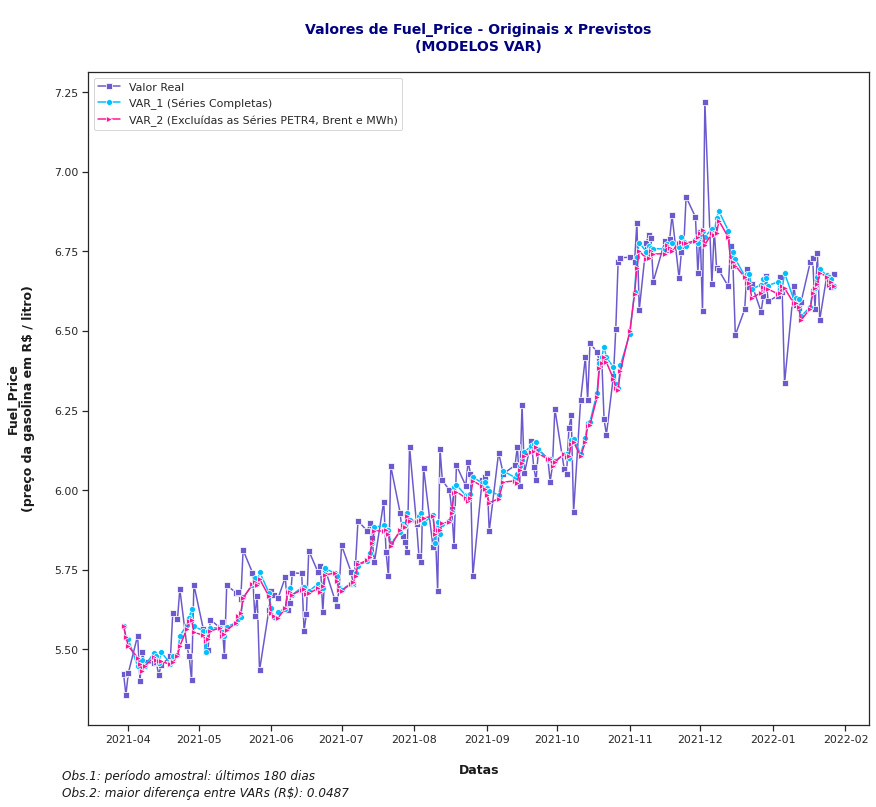

In [ ]:
# Amostra de 180 dias:
dias_plot = 180
df_plot = gera_df_amostra(df_ypred_new, dias_plot)

# Plot:
fig = plt.figure(figsize=(14,12))

sns.lineplot(df_plot["DATAS"], df_plot["y_REAL"], c='slateblue',
             marker="s", label='Valor Real', lw=1.5)
sns.lineplot(df_plot["DATAS"], df_plot["y_VAR_1"], c='deepskyblue',
             marker="o", label='VAR_1 (Séries Completas)', lw=1.5)
sns.lineplot(df_plot["DATAS"], df_plot["y_VAR_2"], c='deeppink',
             marker=">", label='VAR_2 (Excluídas as Séries PETR4, Brent e MWh)', lw=1.5)

plt.title("\nValores de Fuel_Price - Originais x Previstos\n(MODELOS VAR)\n",
          c='navy', fontweight="bold", fontsize=14)
max_dif = round(max(abs(df_plot["y_VAR_1"]-df_plot["y_VAR_2"])),5)
plt.ylabel("Fuel_Price\n(preço da gasolina em R$ / litro)\n", c='k',
           fontweight="bold", fontsize=12.5)
plt.xlabel("\nDatas", c='k', fontweight="bold", fontsize=12.5)
plt.legend()
plt.figtext(0.0995,0.0615,f"Obs.1: período amostral: últimos {dias_plot} dias",
            c='k', fontsize=12, style='italic')
plt.figtext(0.0995,0.0415,f"Obs.2: maior diferença entre VARs (R$): {max_dif:.4f}",
            c='k', fontsize=12, style='italic')

#Salvando o gráfico/a figura gerada:
fig = plt.gcf()
fig.savefig(path_fig+f'COMPARA_VARS_{dias_plot}_dias', format='jpg')
plt.show()

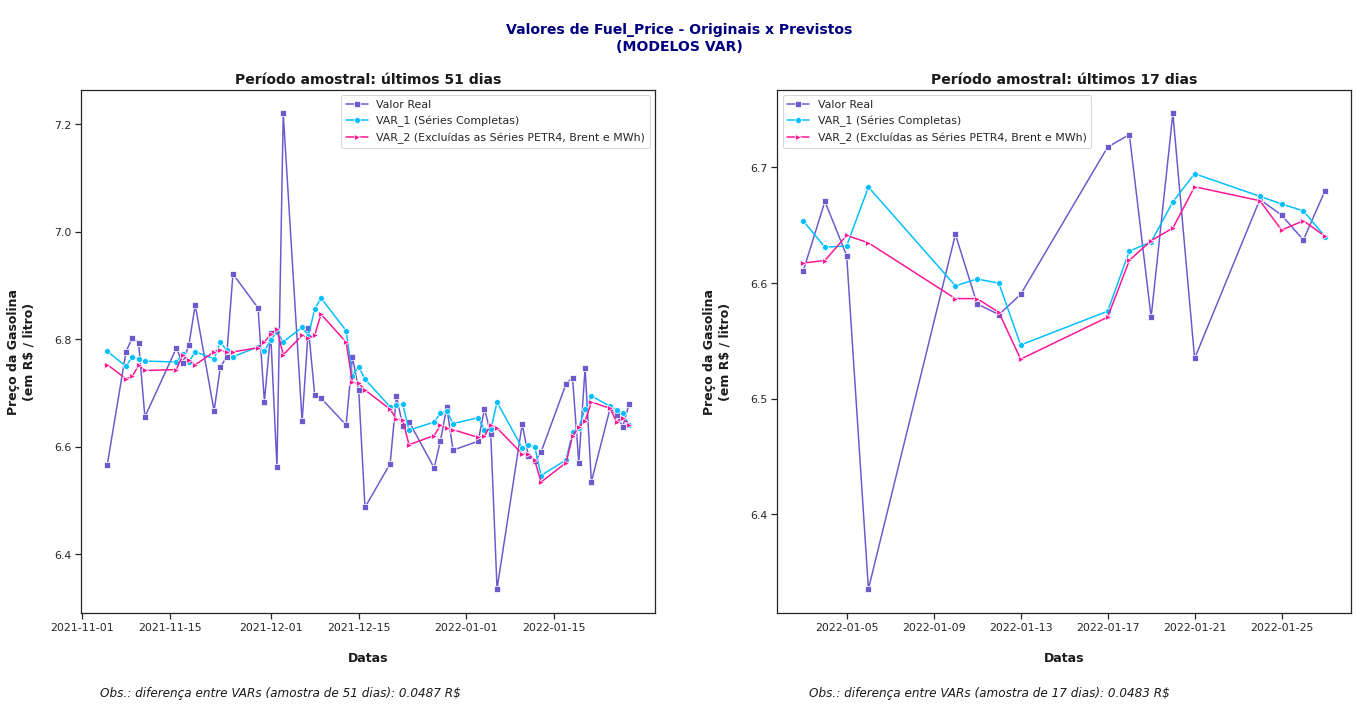

In [ ]:
# Amostra de 17 e 51 dias:
dias_plot_1 = 51
df_plot_1 = gera_df_amostra(df_ypred_new, dias_plot_1)
dias_plot_2 = 17
df_plot_2 = gera_df_amostra(df_ypred_new, dias_plot_2)

max_dif_1 = round(max(abs(df_plot_1["y_VAR_1"]-df_plot_1["y_VAR_2"])),5)
max_dif_2 = round(max(abs(df_plot_2["y_VAR_1"]-df_plot_2["y_VAR_2"])),5)

# Plot:
plt.subplots(figsize=(20, 10)) 
ax1 = plt.subplot(1, 2, 1)
sns.lineplot(df_plot_1["DATAS"], df_plot_1["y_REAL"], c='slateblue',
             marker="s", label='Valor Real', lw=1.5)
sns.lineplot(df_plot_1["DATAS"], df_plot_1["y_VAR_1"], c='deepskyblue',
             marker="o", label='VAR_1 (Séries Completas)', lw=1.5)
sns.lineplot(df_plot_1["DATAS"], df_plot_1["y_VAR_2"], c='deeppink',
             marker=">", label='VAR_2 (Excluídas as Séries PETR4, Brent e MWh)', lw=1.5)
plt.title(f"\n\nPeríodo amostral: últimos {dias_plot_1} dias",
          c='k', fontweight="bold", fontsize=14)
plt.ylabel("Preço da Gasolina\n(em R$ / litro)\n", c='k',
           fontweight="bold", fontsize=12.5)
plt.xlabel("\nDatas", c='k', fontweight="bold", fontsize=12.5)
plt.legend()

ax2 = plt.subplot(1, 2, 2)
#ax2.label_outer()
sns.lineplot(df_plot_2["DATAS"], df_plot_2["y_REAL"], c='slateblue',
             marker="s", label='Valor Real', lw=1.5)
sns.lineplot(df_plot_2["DATAS"], df_plot_2["y_VAR_1"], c='deepskyblue',
             marker="o", label='VAR_1 (Séries Completas)', lw=1.5)
sns.lineplot(df_plot_2["DATAS"], df_plot_2["y_VAR_2"], c='deeppink',
             marker=">", label='VAR_2 (Excluídas as Séries PETR4, Brent e MWh)', lw=1.5)
plt.title(f"\n\nPeríodo amostral: últimos {dias_plot_2} dias",
          c='k', fontweight="bold", fontsize=14)
plt.ylabel("Preço da Gasolina\n(em R$ / litro)\n", c='k',
           fontweight="bold", fontsize=12.5)
plt.xlabel("\nDatas", c='k', fontweight="bold", fontsize=12.5)
plt.legend()

plt.suptitle("\nValores de Fuel_Price - Originais x Previstos\n(MODELOS VAR)\n\n",
             c='navy', fontweight="bold", fontsize=14)

plt.tight_layout(4) 

plt.figtext(0.0975,0.0215,
            f"Obs.: diferença entre VARs (amostra de {dias_plot_1} dias): {max_dif_1:.4f} R$",
            c='k', fontsize=12, style='italic')
plt.figtext(0.590,0.0215,
            f"Obs.: diferença entre VARs (amostra de {dias_plot_2} dias): {max_dif_2:.4f} R$",
            c='k', fontsize=12, style='italic')

#Salvando o gráfico/a figura gerada:
fig = plt.gcf()
fig.savefig(path_fig+f'COMPARA_VARS_{dias_plot_1}_e_{dias_plot_2}_dias', format='jpg')

plt.show()

##**Recalculando as métricas**
<hr>

In [ ]:
# Retornar novas métricas dos modelos gerados:
def novas_metricas (df_amostra):
    #Calcula as seguintes métricas:
    #RMSE = Raiz do Erro Quadrático Médio
    #MAE = Erro Absoluto Médio
    #corr = Correlação de Pearson

    variaveis = df_amostra.drop(columns=['DATAS','y_REAL']).columns
    df = pd.DataFrame(np.zeros((len(['RMSE','MAE','corr']), len(variaveis))),
                      columns=variaveis, index=['RMSE','MAE','corr'])
    for c in df.columns:
      # Calculando as métricas de validação:
      rmse = np.sqrt(np.mean((df_amostra.loc[:,c] - df_amostra['y_REAL'])**2))
      mae = np.mean(np.abs(df_amostra.loc[:,c] - df_amostra['y_REAL']))
      corr = np.corrcoef(df_amostra.loc[:,c], df_amostra['y_REAL'])[0,1]
      # Inserindo no novo dataframe de métricas:
      df.loc['RMSE', c] = rmse
      df.loc['MAE', c] = mae
      df.loc['corr', c] = corr
    df.columns = list(map(lambda x: str(x[2:]), variaveis))
    return df.transpose()

In [ ]:
# Amostra de 217 dias (todos os dias disponíveis):
dias_plot_amostra = df_ypred_new.shape[0]
df_amostra_metrics = gera_df_amostra(df_ypred_new, dias_plot_amostra)
# Gerando o dataframe com novas métricas:
df_new_metrics = novas_metricas(df_amostra_metrics)
# Salvando dataframe como CSV 
df_new_metrics.to_csv(path_analise+"df_new_metrics.csv", header=True, index=True)
# Salvando dataframe como Excel:
df_new_metrics.to_excel(path_analise+"df_new_metrics.xls", header=True, index=True)

In [ ]:
df_new_metrics

,RMSE,MAE,corr
ARIMA_1,0.131888,0.102119,0.974320
ARIMA_2,0.132053,0.102407,0.974197
VAR_1,0.129181,0.098953,0.973886
VAR_2,0.128382,0.099168,0.974635
LSTM_1,0.160811,0.126215,0.972672
LSTM_2,0.131684,0.103806,0.972718


##**Gráficos LSTM**
<hr>

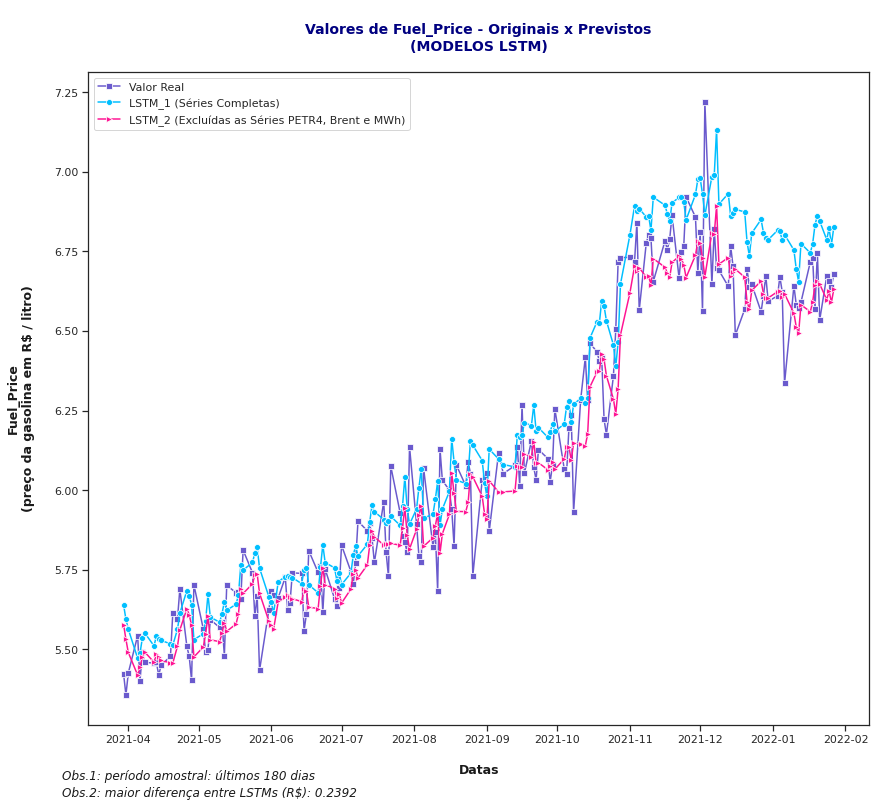

In [ ]:
# Amostra de 180 dias:
dias_plot = 180
df_plot = gera_df_amostra(df_ypred_new, dias_plot)

# Plot:
fig = plt.figure(figsize=(14,12))

sns.lineplot(df_plot["DATAS"], df_plot["y_REAL"], c='slateblue',
             marker="s", label='Valor Real', lw=1.5)
sns.lineplot(df_plot["DATAS"], df_plot["y_LSTM_1"], c='deepskyblue',
             marker="o", label='LSTM_1 (Séries Completas)', lw=1.5)
sns.lineplot(df_plot["DATAS"], df_plot["y_LSTM_2"], c='deeppink',
             marker=">", label='LSTM_2 (Excluídas as Séries PETR4, Brent e MWh)', lw=1.5)

plt.title("\nValores de Fuel_Price - Originais x Previstos\n(MODELOS LSTM)\n",
          c='navy', fontweight="bold", fontsize=14)
max_dif = round(max(abs(df_plot["y_LSTM_1"]-df_plot["y_LSTM_2"])),5)
plt.ylabel("Fuel_Price\n(preço da gasolina em R$ / litro)\n", c='k',
           fontweight="bold", fontsize=12.5)
plt.xlabel("\nDatas", c='k', fontweight="bold", fontsize=12.5)
plt.legend()
plt.figtext(0.0995,0.0615,f"Obs.1: período amostral: últimos {dias_plot} dias",
            c='k', fontsize=12, style='italic')
plt.figtext(0.0995,0.0415,f"Obs.2: maior diferença entre LSTMs (R$): {max_dif:.4f}",
            c='k', fontsize=12, style='italic')

#Salvando o gráfico/a figura gerada:
fig = plt.gcf()
fig.savefig(path_fig+f'COMPARA_LSTMS_{dias_plot}_dias', format='jpg')
plt.show()

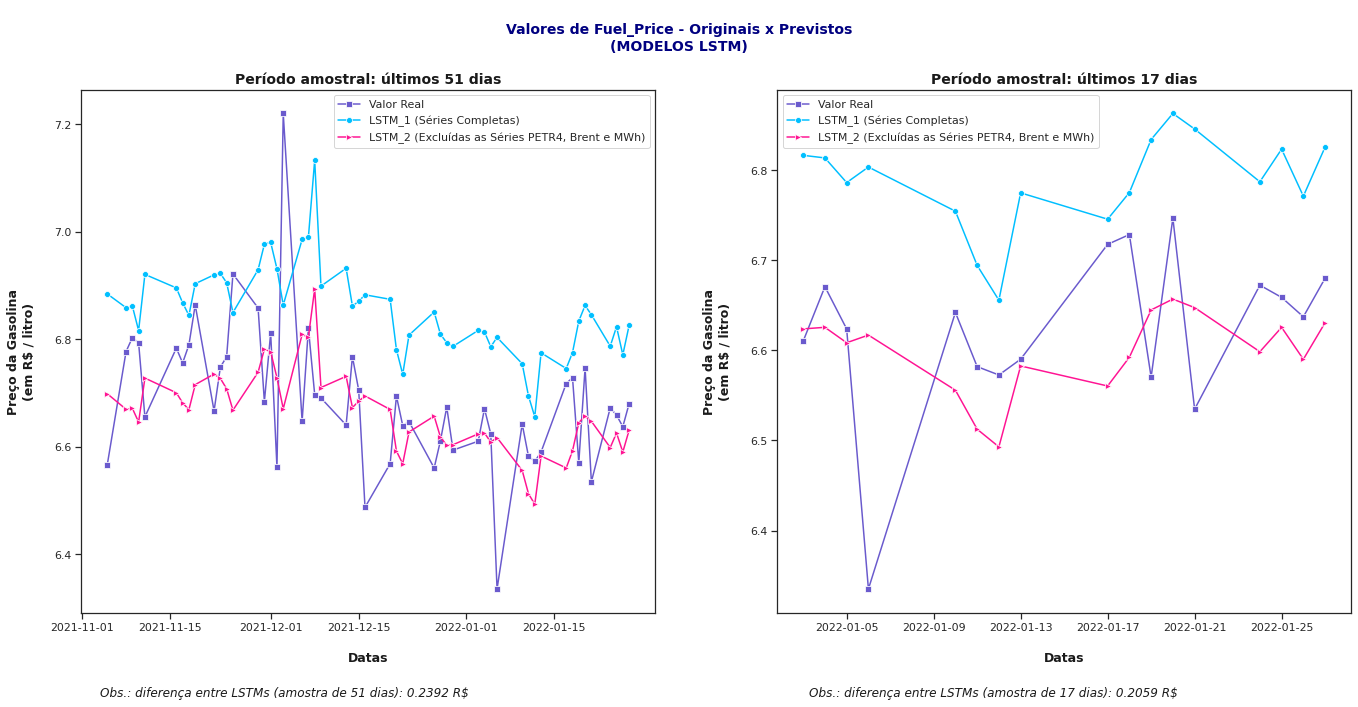

In [ ]:
# Amostra de x dias:
dias_plot_1 = 51
df_plot_1 = gera_df_amostra(df_ypred_new, dias_plot_1)
dias_plot_2 = 17
df_plot_2 = gera_df_amostra(df_ypred_new, dias_plot_2)

max_dif_1 = round(max(abs(df_plot_1["y_LSTM_1"]-df_plot_1["y_LSTM_2"])),5)
max_dif_2 = round(max(abs(df_plot_2["y_LSTM_1"]-df_plot_2["y_LSTM_2"])),5)

# Plot:
plt.subplots(figsize=(20, 10)) 
ax1 = plt.subplot(1, 2, 1)
sns.lineplot(df_plot_1["DATAS"], df_plot_1["y_REAL"], c='slateblue',
             marker="s", label='Valor Real', lw=1.5)
sns.lineplot(df_plot_1["DATAS"], df_plot_1["y_LSTM_1"], c='deepskyblue',
             marker="o", label='LSTM_1 (Séries Completas)', lw=1.5)
sns.lineplot(df_plot_1["DATAS"], df_plot_1["y_LSTM_2"], c='deeppink',
             marker=">", label='LSTM_2 (Excluídas as Séries PETR4, Brent e MWh)', lw=1.5)
plt.title(f"\n\nPeríodo amostral: últimos {dias_plot_1} dias",
          c='k', fontweight="bold", fontsize=14)
plt.ylabel("Preço da Gasolina\n(em R$ / litro)\n", c='k',
           fontweight="bold", fontsize=12.5)
plt.xlabel("\nDatas", c='k', fontweight="bold", fontsize=12.5)
plt.legend()

ax2 = plt.subplot(1, 2, 2)
#ax2.label_outer()
sns.lineplot(df_plot_2["DATAS"], df_plot_2["y_REAL"], c='slateblue',
             marker="s", label='Valor Real', lw=1.5)
sns.lineplot(df_plot_2["DATAS"], df_plot_2["y_LSTM_1"], c='deepskyblue',
             marker="o", label='LSTM_1 (Séries Completas)', lw=1.5)
sns.lineplot(df_plot_2["DATAS"], df_plot_2["y_LSTM_2"], c='deeppink',
             marker=">", label='LSTM_2 (Excluídas as Séries PETR4, Brent e MWh)', lw=1.5)
plt.title(f"\n\nPeríodo amostral: últimos {dias_plot_2} dias",
          c='k', fontweight="bold", fontsize=14)
plt.ylabel("Preço da Gasolina\n(em R$ / litro)\n", c='k',
           fontweight="bold", fontsize=12.5)
plt.xlabel("\nDatas", c='k', fontweight="bold", fontsize=12.5)
plt.legend()

plt.suptitle("\nValores de Fuel_Price - Originais x Previstos\n(MODELOS LSTM)\n\n",
             c='navy', fontweight="bold", fontsize=14)

plt.tight_layout(4) 

plt.figtext(0.0975,0.0215,
            f"Obs.: diferença entre LSTMs (amostra de {dias_plot_1} dias): {max_dif_1:.4f} R$",
            c='k', fontsize=12, style='italic')
plt.figtext(0.590,0.0215,
            f"Obs.: diferença entre LSTMs (amostra de {dias_plot_2} dias): {max_dif_2:.4f} R$",
            c='k', fontsize=12, style='italic')

#Salvando o gráfico/a figura gerada:
fig = plt.gcf()
fig.savefig(path_fig+f'COMPARA_LSTMS_{dias_plot_1}_e_{dias_plot_2}_dias', format='jpg')

plt.show()

##**Gráficos ARIMA_1, VAR_2 e LSTM_2**
<hr>

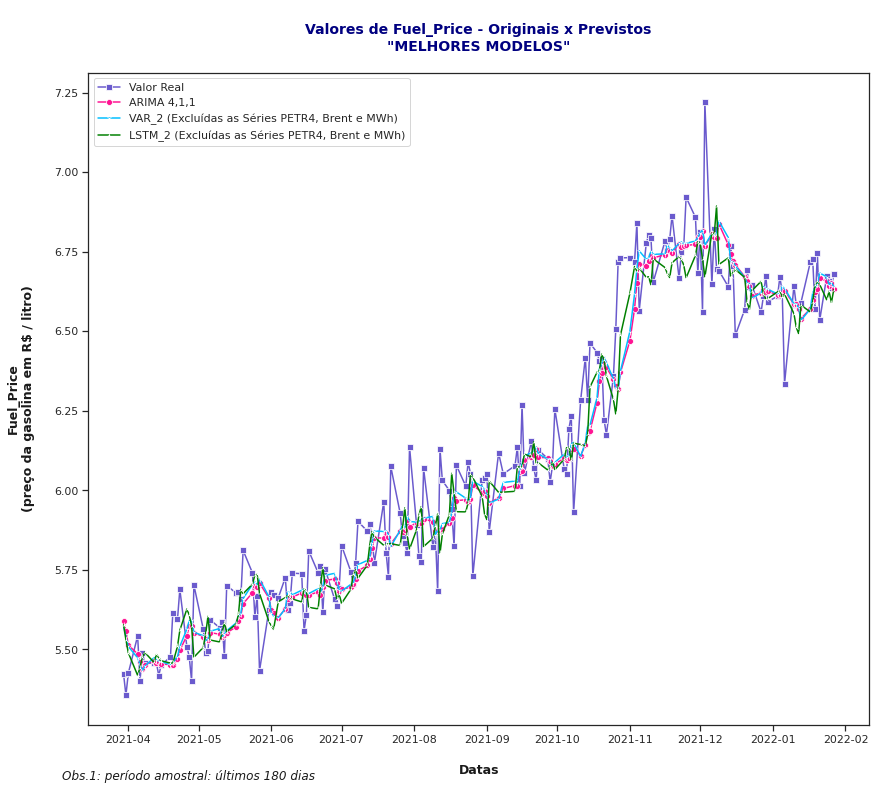

In [ ]:
# Amostra de 180 dias:
dias_plot = 180
df_plot = gera_df_amostra(df_ypred_new, dias_plot)

# Plot:
fig = plt.figure(figsize=(14,12))

sns.lineplot(df_plot["DATAS"], df_plot["y_REAL"], c='slateblue',
             marker="s", label='Valor Real', lw=1.5)
sns.lineplot(df_plot["DATAS"], df_plot["y_ARIMA_1"], c='deeppink',
             marker="o", label='ARIMA 4,1,1', lw=1.5)
sns.lineplot(df_plot["DATAS"], df_plot["y_VAR_2"], c='deepskyblue',
             marker="1", label='VAR_2 (Excluídas as Séries PETR4, Brent e MWh)', lw=1.5)
sns.lineplot(df_plot["DATAS"], df_plot["y_LSTM_2"], c='green',
             marker="2", label='LSTM_2 (Excluídas as Séries PETR4, Brent e MWh)', lw=1.5)

plt.title('\nValores de Fuel_Price - Originais x Previstos\n"MELHORES MODELOS"\n',
          c='navy', fontweight="bold", fontsize=14)
plt.ylabel("Fuel_Price\n(preço da gasolina em R$ / litro)\n", c='k',
           fontweight="bold", fontsize=12.5)
plt.xlabel("\nDatas", c='k', fontweight="bold", fontsize=12.5)
plt.legend()
plt.figtext(0.0995,0.0615,f"Obs.1: período amostral: últimos {dias_plot} dias",
            c='k', fontsize=12, style='italic')

#Salvando o gráfico/a figura gerada:
fig = plt.gcf()
fig.savefig(path_fig+f'COMPARA_TODOS_{dias_plot}_dias', format='jpg')
plt.show()

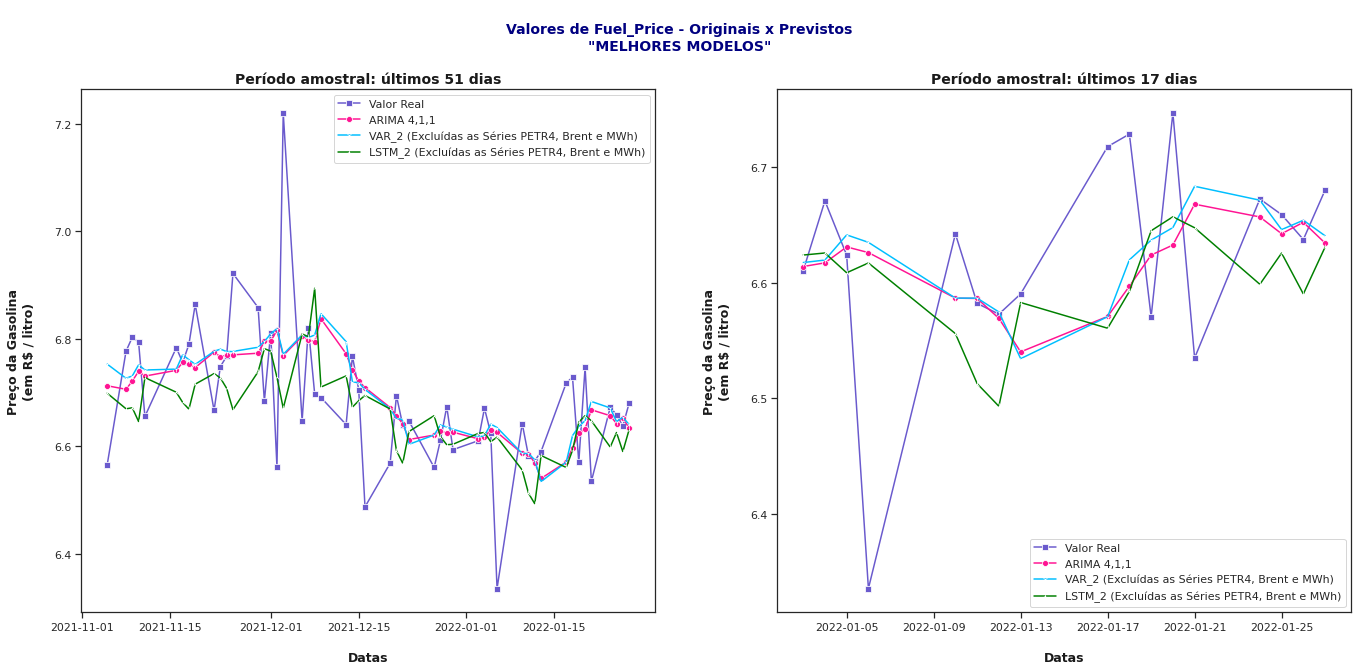

In [ ]:
# Amostra de 17 e 51 dias:
dias_plot_1 = 51
df_plot_1 = gera_df_amostra(df_ypred_new, dias_plot_1)
dias_plot_2 = 17
df_plot_2 = gera_df_amostra(df_ypred_new, dias_plot_2)

# Plot:
plt.subplots(figsize=(20, 10)) 
ax1 = plt.subplot(1, 2, 1)
sns.lineplot(df_plot_1["DATAS"], df_plot_1["y_REAL"], c='slateblue',
             marker="s", label='Valor Real', lw=1.5)
sns.lineplot(df_plot_1["DATAS"], df_plot_1["y_ARIMA_1"], c='deeppink',
             marker="o", label='ARIMA 4,1,1', lw=1.5)
sns.lineplot(df_plot_1["DATAS"], df_plot_1["y_VAR_2"], c='deepskyblue',
             marker="1", label='VAR_2 (Excluídas as Séries PETR4, Brent e MWh)', lw=1.5)
sns.lineplot(df_plot_1["DATAS"], df_plot_1["y_LSTM_2"], c='green',
             marker="2", label='LSTM_2 (Excluídas as Séries PETR4, Brent e MWh)', lw=1.5)
plt.title(f"\n\nPeríodo amostral: últimos {dias_plot_1} dias",
          c='k', fontweight="bold", fontsize=14)
plt.ylabel("Preço da Gasolina\n(em R$ / litro)\n", c='k',
           fontweight="bold", fontsize=12.5)
plt.xlabel("\nDatas", c='k', fontweight="bold", fontsize=12.5)
plt.legend()

ax2 = plt.subplot(1, 2, 2)
sns.lineplot(df_plot_2["DATAS"], df_plot_2["y_REAL"], c='slateblue',
             marker="s", label='Valor Real', lw=1.5)
sns.lineplot(df_plot_2["DATAS"], df_plot_2["y_ARIMA_1"], c='deeppink',
             marker="o", label='ARIMA 4,1,1', lw=1.5)
sns.lineplot(df_plot_2["DATAS"], df_plot_2["y_VAR_2"], c='deepskyblue',
             marker="1", label='VAR_2 (Excluídas as Séries PETR4, Brent e MWh)', lw=1.5)
sns.lineplot(df_plot_2["DATAS"], df_plot_2["y_LSTM_2"], c='green',
             marker="2", label='LSTM_2 (Excluídas as Séries PETR4, Brent e MWh)', lw=1.5)
plt.title(f"\n\nPeríodo amostral: últimos {dias_plot_2} dias",
          c='k', fontweight="bold", fontsize=14)
plt.ylabel("Preço da Gasolina\n(em R$ / litro)\n", c='k',
           fontweight="bold", fontsize=12.5)
plt.xlabel("\nDatas", c='k', fontweight="bold", fontsize=12.5)
plt.legend()

plt.suptitle('\nValores de Fuel_Price - Originais x Previstos\n"MELHORES MODELOS"\n\n',
             c='navy', fontweight="bold", fontsize=14)

plt.tight_layout(4) 

#Salvando o gráfico/a figura gerada:
fig = plt.gcf()
fig.savefig(path_fig+f'COMPARA_TODOS_{dias_plot_1}_e_{dias_plot_2}_dias', format='jpg')

plt.show()


##**Gráficos Boxplot: valores reais, previstos e variações percentuais**
<hr>

In [ ]:
# Copiando o dataframe com valores reais e previstos para análise
df_amostra = df_ypred_new.copy()
df_amostra.drop(columns=['DATAS','y_ARIMA_2','y_VAR_1','y_LSTM_1'], inplace=True)
df_amostra.rename(columns={"y_REAL": "REAL", "y_ARIMA_1": "ARIMA(4,1,1)",
                           "y_VAR_2": "VAR_2", "y_LSTM_2": "LSTM_2"},
                  inplace = True)
df_amostra.describe()

,REAL,"ARIMA(4,1,1)",VAR_2,LSTM_2
count,217.000000,217.000000,217.000000,217.000000
mean,5.956540,5.922378,5.932763,5.929191
std,0.556261,0.566765,0.564329,0.545120
min,4.533405,4.617979,4.628515,4.638906
25%,5.594524,5.567480,5.572543,5.579129
50%,5.870485,5.875097,5.882899,5.858456
75%,6.506270,6.402030,6.416862,6.488065
max,7.220000,6.837155,6.846599,6.893850


In [ ]:
# Criando um dataframe com as variações percentuais dos valores:
df_pct_change = df_amostra.copy()
df_pct_change = df_pct_change.pct_change().dropna()
df_pct_change.rename(columns={"y_REAL": "REAL", "y_ARIMA_1": "ARIMA(4,1,1)",
                              "y_VAR_2": "VAR_2", "y_LSTM_2": "LSTM_2"},
                     inplace = True)
df_pct_change.describe()


,REAL,"ARIMA(4,1,1)",VAR_2,LSTM_2
count,216.000000,216.000000,216.000000,216.000000
mean,0.001878,0.001689,0.001687,0.001695
std,0.025974,0.004638,0.005474,0.008896
min,-0.079336,-0.012060,-0.016609,-0.026654
25%,-0.013001,-0.001344,-0.001493,-0.003697
50%,0.000311,0.001199,0.001141,0.000507
75%,0.016991,0.004421,0.004832,0.007453
max,0.100328,0.015618,0.019463,0.026810


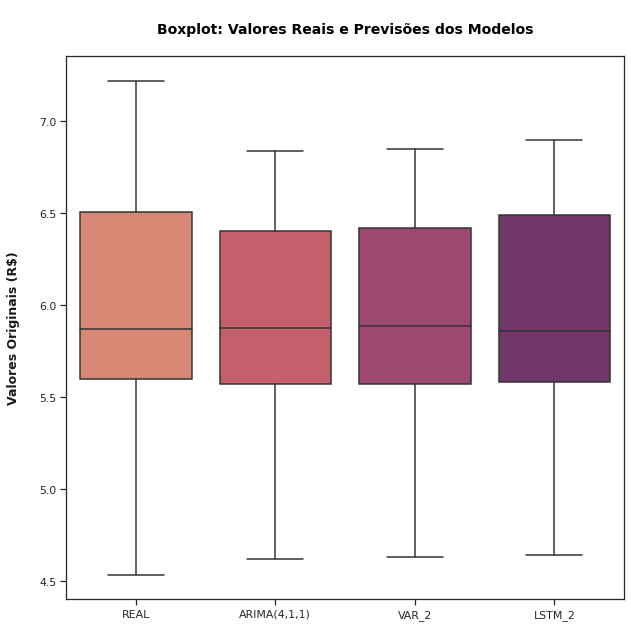

In [ ]:
# Plot:
fig = plt.figure(figsize=(10, 10))
sns.boxplot(data = df_amostra, palette="flare")
plt.title('\nBoxplot: Valores Reais e Previsões dos Modelos\n',
          c='black', fontweight="bold", fontsize=14)
plt.ylabel("Valores Originais (R$)\n", c='k',
           fontweight="bold", fontsize=12.5)
#Salvando o gráfico/a figura gerada:
fig = plt.gcf()
fig.savefig(path_fig+f'BOXPLOT_DADOS_ORIGINAIS', format='jpg')
plt.show()

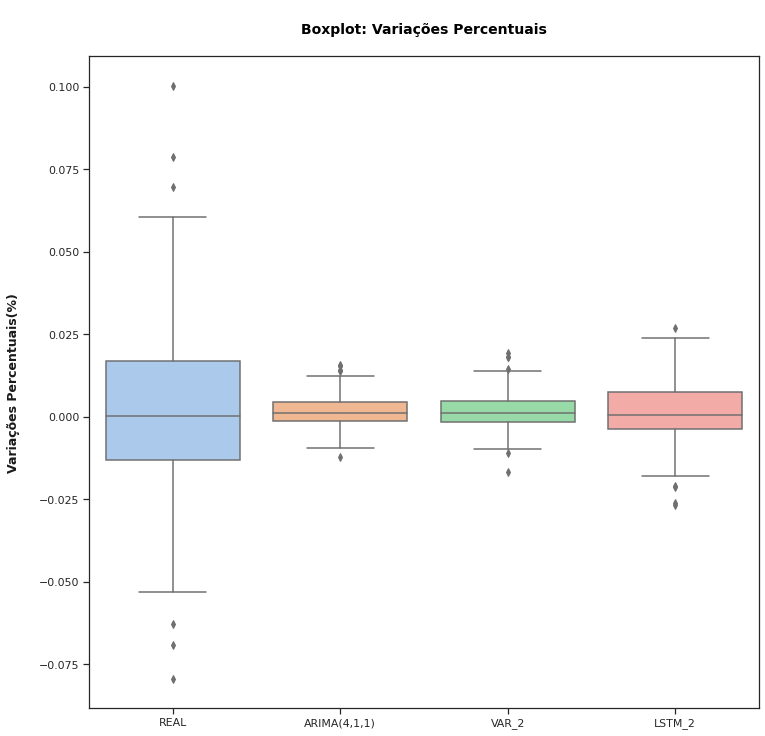

In [ ]:
# Plot:
fig = plt.figure(figsize=(12,12))
sns.boxplot(data = df_pct_change, palette="pastel")
plt.title('\nBoxplot: Variações Percentuais\n',
          c='black', fontweight="bold", fontsize=14)
plt.ylabel("Variações Percentuais(%)\n", c='k',
           fontweight="bold", fontsize=12.5)
#Salvando o gráfico/a figura gerada:
fig = plt.gcf()
fig.savefig(path_fig+f'BOXPLOT_PCT_CHANGE', format='jpg')
plt.show()

# **FIM**